<p style="font-weight:bold; letter-spacing: 2px; color:#F5F5DC; font-size:140%; text-align:left; max-width: 1050px; padding: 10px; border-bottom: 3px solid #D2B48C"> Naive Bayes Classification</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>🧠 Algorithm Intuition:</font></h3>

<ul>
    <li>Bayes rule calculates the "posterior" probability of an event (A) given evidence (B), i.e. --> (A | B). Intuitively, this is equal to the probability of that event before any evidence (the "prior") (A) multiplied by a factor that increases or decreases it according the new evidence (B). 
    That factor is defined as the probability of seeing that evidence given the event (B | A) over the probability of seeing the evidence all together (B). If it's more likely to the see the evidence when the event has occured than the overall probability of seeing the evidence reagrdless of whether the event has occured or not, this ratio is greater than 1. Therefore, the prior probability of seeing the event is scaled up to produce a larger new posterior probability. Likewise, is the ratio is less than 1 because it's less likely to see the evidence when the event has occured, the prior probability is scaled down to produce a smaller new posterior probability.</li>
</ul>
</div>


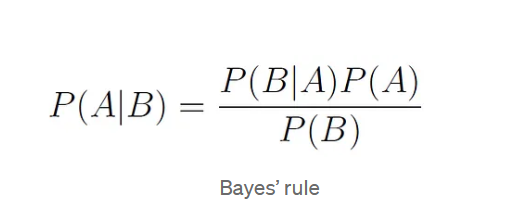

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<ul>
    <li>In terms of multiclass classification, the parallels are simple.<br><br>
    The total data is defined as <i>D</i> = {(x₁, <i>y₁</i>), (x₂, <i>y₂</i>), … , (xₙ, <i>yₙ</i>)} where xᵢ is each observation within the X array and <i>yᵢ</i> is the corresponding label / class. The label can take any of <i>K</i> classes, i.e., <i>y</i> ∈ {1, …, <i>K</i>}.<br><br>
    The event (A) is whether or not an observation's <i>y</i> value belongs to a certain class <i>k</i> (<i>y</i>=<i>k</i>).<br>
    The evidence (B) is an observation's x array, composed of features (<i>x₁</i>, <i>x₂</i>, … , <i>xⱼ</i>)</li>
</ul>
</div>


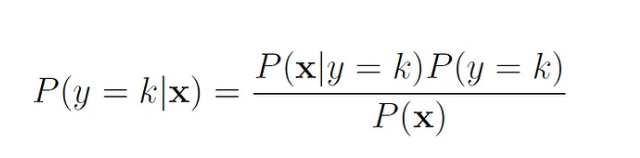

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<ul>
    <li>The three components define as follows:</li>
    <li>Note that P(x | <i>y</i> = <i>k</i>) carries a large assumption: all features are independant of another. This is where "Naive" comes in. This is rarely true in real use cases but allows the conditional probabilities of x to be split in to the products of individual feature probabilities P(<i>xⱼ</i> | <i>y</i> = <i>k</i>). If this assumption wasn't in place, the number of conditional probabilities would be 2m for eahc class K (hense 2mK) - in most cases, there will not be enough training samples to estimate them all. Even in cases where there are, it would take an exponential time to do it.
</ul>
</div>


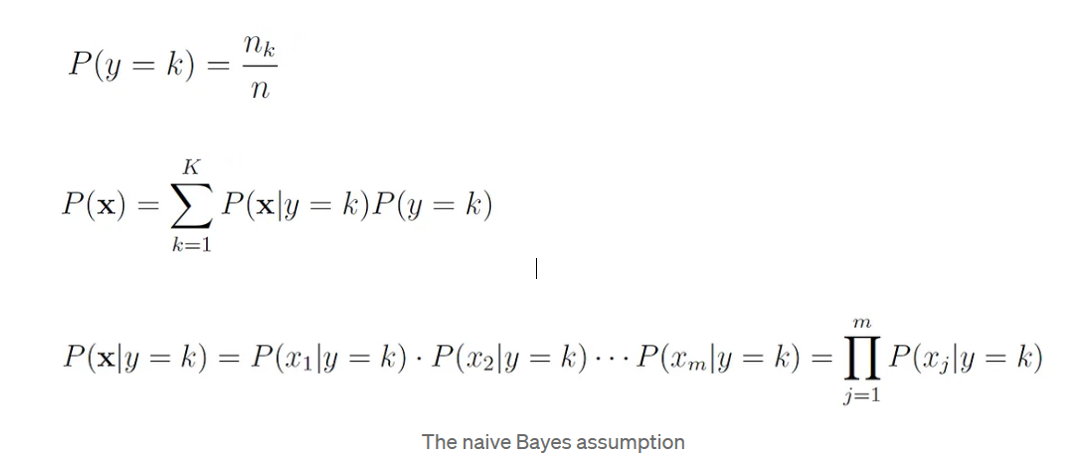

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>🥅 MAP (Maximum A-Posteriori)</font></h3>

<ul>
    <li>With the naive assumption in place, the class that is chosen is the one that maximises the value of the numertor of the formula. This is because the denominator P(x) is a constant for all classes and hense just a scaling factor to produce a probability. To assign classes, the given probability doesn't matter, only that the maximum one is chosen. Maximising the numorator maximises the numerator / demonintor (posterior probability) and hense the objective function is defined:</li>
</ul>
</div>


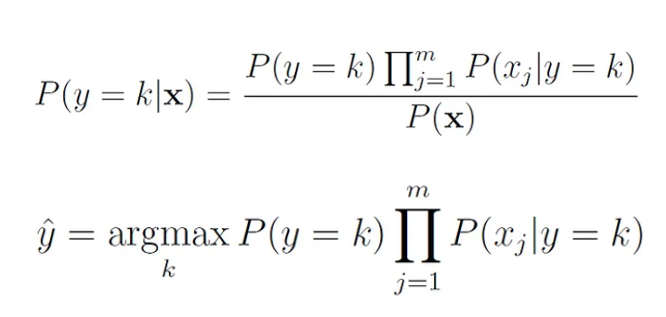

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>📏 Paramter Estimation:</font></h3>

<ul>
    <li>Calculating conditional probabilities for each feature requires the feature to be modelled as a certain "event", i.e. an "event model". This depends on the type of the feature (numeric or cateogrical) and the distribution.</li>
    <li>The four event types are as follows:</li>
        <ul>
            <li><b>Bernoulli Naive Bayes:</b> features xⱼ are modeled as independent binary variables with a Bernoulli distribution</li>
            <li><b>Categorical Naive Bayes:</b> features xⱼ are modeled as independent discrete variables with a categorical  distribution</li> 
            <li><b>Multinomial Naive Bayes:</b> one feature x is modeled as features xⱼ using category histograms with a categorical  distribution</li>
            <li><b>Gaussian Naive Bayes:</b> features xⱼ are modeled as independent continuous variables with a Gaussian distribution</li>
        </ul>
</ul>
</div>


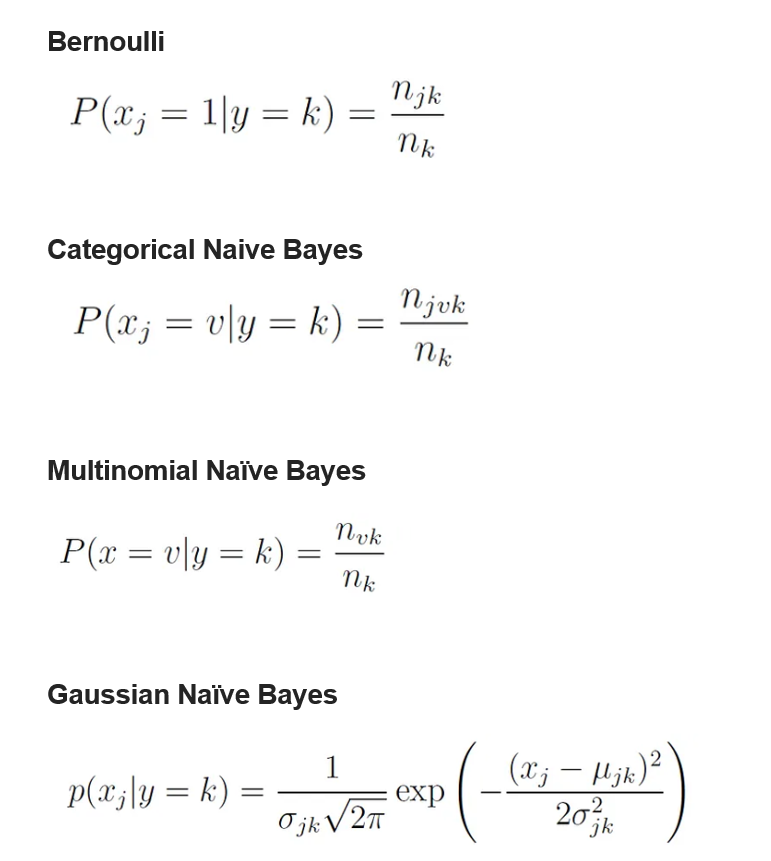

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<ul>
    <li>To learn more (requires membership): https://medium.com/towards-data-science/naive-bayes-classification-41d1fe802a1e</li>
</ul>
</div>


*Import Libraries*

In [142]:
# import custom classes, functions and variables. Reload file in to memory on cell excution.
import importlib
import settings
importlib.reload(settings)

# import data frameworks
import pandas as pd
import numpy as np

# import viz
import matplotlib.pyplot as plt
import seaborn as sns

# import ML
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from imblearn.over_sampling import SMOTEN


# import others
import os
import pickle
import warnings

*Supress warnings*

In [143]:
# Specific warning categories to be ignored
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

*Import data from initial EDA*

In [144]:
df = pd.read_csv(os.path.join(settings.DATA_EDA_DIR, settings.DATA_EDA_FILE), sep=",")
if len(df) > 0:
    print("df loaded")

df loaded


*Split data and prepare labels*

In [145]:
ALL_FEATURES = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
                'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 
                'Daily Steps', 'Blood Pressure Category']
X = df[ALL_FEATURES]
y = df[settings.LABEL]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [146]:
# Encode y vector 
map = {"None":0, "Sleep Apnea":1, "Insomnia":2}
# apply mapping function
settings.column_mapper(y_train, "Sleep Disorder", map)
settings.column_mapper(y_test, "Sleep Disorder", map)

In [147]:
# reshape labels to 1-D array (vector) 
y_train, y_test = y_train.values.reshape(-1), y_test.values.reshape(-1)

*sklearn implements all 4 NB event models <b>separately</b>. In order to model, must turn all features to one type of event*<br>
*<b>Choice:</b> all become Bernoulli. Binning numerical features*

*Preprocess steps*

In [148]:
# SET UP AND VERIFICATION OF TRANSFORMERS STEPS BEFORE PIPELINE

# Create a custom binner for df transform
binner = settings.CustomBinnerNB()

# Transform step 1
binned_X_train_array = binner.fit_transform(X_train)
binned_X_test_array = binner.transform(X_test)

# Retrieve new column names for OneHotEncoder
ALL_FEATURES_BINS = binned_X_train_array.columns 

# Create a column transformer for encoding
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse = False, handle_unknown='ignore'), ALL_FEATURES_BINS)
    ],
    remainder='passthrough')

# Transform step 2
transformed_X_train_array = column_trans.fit_transform(binned_X_train_array)
transformed_X_test_array = column_trans.transform(binned_X_test_array)

# # Convert to df as a sense check. Use only for interpretibility before using for pipeline. 
transformed_X_train_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_train_array)
transformed_X_test_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_test_array)

# Check ohe and scaled datasets
display("train: check for dummy encoded columns and scaled values (mean 0 and std 1)",transformed_X_train_df.shape, transformed_X_train_df.describe().loc[["mean", "std"],:])
display("test: check for same dummy encoded columns and scaled values (mean close to 0 and std close to 1)",transformed_X_test_df.shape, transformed_X_test_df.describe().loc[["mean", "std"],:])

'train: check for dummy encoded columns and scaled values (mean 0 and std 1)'

(261, 65)

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,Occupation_Unknown,Quality of Sleep_4,Quality of Sleep_5,Quality of Sleep_6,Quality of Sleep_7,Quality of Sleep_8,Quality of Sleep_9,Stress Level_3,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,BMI Category_Normal,BMI Category_Overweight,Blood Pressure Category_Elevated,Blood Pressure Category_High Blood Pressure Stage 1,Blood Pressure Category_High Blood Pressure Stage 2,Blood Pressure Category_Normal,Age Bin_25-29,Age Bin_30-34,Age Bin_35-39,Age Bin_40-44,Age Bin_45-49,Age Bin_50-54,Age Bin_55-59,Sleep Duration Bin_5.5-5.9,Sleep Duration Bin_6.0-6.4,Sleep Duration Bin_6.5-6.9,Sleep Duration Bin_7.0-7.4,Sleep Duration Bin_7.5-7.9,Sleep Duration Bin_8.0-8.4,Physical Activity Level Bin_20-29,Physical Activity Level Bin_30-39,Physical Activity Level Bin_40-49,Physical Activity Level Bin_50-59,Physical Activity Level Bin_60-69,Physical Activity Level Bin_70-79,Physical Activity Level Bin_80-89,Heart Rate Bin_60-64,Heart Rate Bin_65-69,Heart Rate Bin_70-74,Heart Rate Bin_75-79,Heart Rate Bin_80-84,Daily Steps Bin_3000-3499,Daily Steps Bin_3500-3999,Daily Steps Bin_4000-4499,Daily Steps Bin_4500-4999,Daily Steps Bin_5000-5499,Daily Steps Bin_5500-5999,Daily Steps Bin_6000-6499,Daily Steps Bin_6500-6999,Daily Steps Bin_7000-7499,Daily Steps Bin_7500-7999,Daily Steps Bin_9500-9999,Daily Steps Bin_<3000
mean,0.494253,0.505747,0.103448,0.183908,0.176245,0.126437,0.183908,0.084291,0.111111,0.030651,0.015326,0.019157,0.272031,0.214559,0.302682,0.176245,0.172414,0.195402,0.183908,0.130268,0.134100,0.183908,0.582375,0.417625,0.318008,0.375479,0.187739,0.118774,0.084291,0.160920,0.187739,0.287356,0.084291,0.107280,0.088123,0.095785,0.210728,0.103448,0.218391,0.214559,0.157088,0.168582,0.026820,0.199234,0.218391,0.011494,0.180077,0.195402,0.183908,0.463602,0.295019,0.030651,0.026820,0.011494,0.007663,0.003831,0.187739,0.019157,0.183908,0.003831,0.183908,0.011494,0.272031,0.103448,0.011494
std,0.500928,0.500928,0.305129,0.388153,0.381761,0.332979,0.388153,0.278358,0.314873,0.172702,0.123081,0.137340,0.445861,0.411305,0.460301,0.381761,0.378465,0.397272,0.388153,0.337245,0.341414,0.388153,0.494115,0.494115,0.466597,0.485177,0.391254,0.324144,0.278358,0.368163,0.391254,0.453399,0.278358,0.310063,0.284018,0.294862,0.408609,0.305129,0.413948,0.411305,0.364583,0.375102,0.161867,0.400192,0.413948,0.106798,0.384990,0.397272,0.388153,0.499631,0.456928,0.172702,0.161867,0.106798,0.087369,0.061898,0.391254,0.137340,0.388153,0.061898,0.388153,0.106798,0.445861,0.305129,0.106798


'test: check for same dummy encoded columns and scaled values (mean close to 0 and std close to 1)'

(113, 65)

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Salesperson,Occupation_Teacher,Occupation_Unknown,Quality of Sleep_4,Quality of Sleep_5,Quality of Sleep_6,Quality of Sleep_7,Quality of Sleep_8,Quality of Sleep_9,Stress Level_3,Stress Level_4,Stress Level_5,Stress Level_6,Stress Level_7,Stress Level_8,BMI Category_Normal,BMI Category_Overweight,Blood Pressure Category_Elevated,Blood Pressure Category_High Blood Pressure Stage 1,Blood Pressure Category_High Blood Pressure Stage 2,Blood Pressure Category_Normal,Age Bin_25-29,Age Bin_30-34,Age Bin_35-39,Age Bin_40-44,Age Bin_45-49,Age Bin_50-54,Age Bin_55-59,Sleep Duration Bin_5.5-5.9,Sleep Duration Bin_6.0-6.4,Sleep Duration Bin_6.5-6.9,Sleep Duration Bin_7.0-7.4,Sleep Duration Bin_7.5-7.9,Sleep Duration Bin_8.0-8.4,Physical Activity Level Bin_20-29,Physical Activity Level Bin_30-39,Physical Activity Level Bin_40-49,Physical Activity Level Bin_50-59,Physical Activity Level Bin_60-69,Physical Activity Level Bin_70-79,Physical Activity Level Bin_80-89,Heart Rate Bin_60-64,Heart Rate Bin_65-69,Heart Rate Bin_70-74,Heart Rate Bin_75-79,Heart Rate Bin_80-84,Daily Steps Bin_3000-3499,Daily Steps Bin_3500-3999,Daily Steps Bin_4000-4499,Daily Steps Bin_4500-4999,Daily Steps Bin_5000-5499,Daily Steps Bin_5500-5999,Daily Steps Bin_6000-6499,Daily Steps Bin_6500-6999,Daily Steps Bin_7000-7499,Daily Steps Bin_7500-7999,Daily Steps Bin_9500-9999,Daily Steps Bin_<3000
mean,0.495575,0.504425,0.088496,0.203540,0.150442,0.123894,0.221239,0.088496,0.097345,0.026549,0.008850,0.017699,0.300885,0.185841,0.265487,0.221239,0.230088,0.168142,0.168142,0.106195,0.132743,0.194690,0.566372,0.433628,0.353982,0.345133,0.212389,0.088496,0.088496,0.176991,0.194690,0.212389,0.106195,0.132743,0.088496,0.106195,0.265487,0.053097,0.194690,0.230088,0.150442,0.212389,0.044248,0.203540,0.168142,0.017699,0.194690,0.159292,0.168142,0.469027,0.283186,0.035398,0.026549,0.017699,0.026549,0.026549,0.185841,0.008850,0.194690,0.0,0.185841,0.008850,0.265487,0.079646,0.0
std,0.502208,0.502208,0.285279,0.404424,0.359097,0.330928,0.416930,0.285279,0.297748,0.161476,0.094072,0.132443,0.460686,0.390711,0.443559,0.416930,0.422764,0.375658,0.375658,0.309459,0.340809,0.397726,0.497783,0.497783,0.480334,0.477529,0.410821,0.285279,0.285279,0.383361,0.397726,0.410821,0.309459,0.340809,0.285279,0.309459,0.443559,0.225226,0.397726,0.422764,0.359097,0.410821,0.206561,0.404424,0.375658,0.132443,0.397726,0.367578,0.375658,0.501263,0.452553,0.185607,0.161476,0.132443,0.161476,0.161476,0.390711,0.094072,0.397726,0.0,0.390711,0.094072,0.443559,0.271950,0.0


*Create pipeline and base model*

In [149]:
# create model
model_nb = CategoricalNB()

# create sklearn pipeline
pipeline_nb = settings.create_pipeline(["Binner", binner],
                                        ["Preprocess", column_trans], 
                                        ["Bernoulli_naive_bayes", model_nb])

# create cross validation object for cross_val_score
cv_nb = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# run training cross validation on pipeline 
cv_scores = cross_val_score(pipeline_nb, X_train, y_train, scoring='accuracy', cv=cv_nb)

settings.cross_val_summary(pipeline_nb, cv_scores, X_train, y_train, X_test, y_test)


Train Accuracy: 88.100 %
Mean CV Train Accuracy: 87.1200 % ( +- 4.600 % )
Test Accuracy: 92.0400 %


In [150]:
# # Visualise averages across many seeds
# settings.plot_seed_variability(X=X, y=y, test_size=0.3, current_seed=42, num_seeds=100, pipeline_or_model=pipeline_nb, scoring="accuracy", cv_object=cv_nb, pipeline_type = "sklearn")


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Good baseline model train cv accuracy ~ 87% and higher test ~92%. Test score is far above CV score and also above train score. </li>
    <li>High variation in cv accuracy scores: 4.6%</li> 
    <li>High dependance on data split which itself depends on the random seed: reason for higher test accuracy in the first case. As seen in the last graph, varying the random seed 100 times results in occassions where test score is much higher than the average (89.2%). On average, model shows no sign of overfitting but large variation in test scores cast the reliability in to doubt. Train CV scores, even with their high variation, provide a more stable assessment.</li>
    <li>Goal will be to maximise Train CV scores and reduce variation. Test score will be evaluated as an additional step but not used for model selection. 
</ul>
</div>


In [151]:
# Save baseline pipeline to file  
settings.save_pipeline("best_naive_bayes_classification_pipeline.pkl", pipeline_nb)

*Hyperparam tuning*

*Smoothing*

In [152]:
# set up param grid
param_grid_nb = {
    'Bernoulli_naive_bayes__alpha': np.linspace(0.1, 1, 10) # default is 1
}

# Create and fit GridSearchCV object on train data
grid_search_nb = GridSearchCV(pipeline_nb, param_grid=param_grid_nb, scoring='accuracy', cv=cv_nb, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

settings.hyperparam_tune_summary(grid_search_nb, X_train, y_train, X_test, y_test)

Best Parameters:


,Bernoulli_naive_bayes__alpha
0,0.1


---------------------
Using best parameters
---------------------
Train Accuracy: 89.300 %
Mean CV Train Accuracy: 88.100 % ( +- 4.100 % )
Test Accuracy: 91.200 %


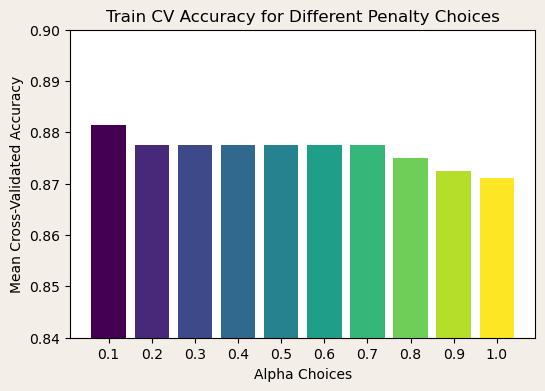

In [153]:
# Access the grid search results
results = grid_search_nb.cv_results_

# Extract C values and accuracy scores
alpha_values = results['param_Bernoulli_naive_bayes__alpha'].data
alpha_values = [str(val)[:3] for val in alpha_values] 
mean_test_scores = results['mean_test_score'].data

# Use a color map for the bars
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(alpha_values)))

# Plot the bars with specified colors
fig, ax = plt.subplots(figsize=(6, 4), gridspec_kw={'hspace': 0.8}, facecolor="#F3EEE7")
bars = ax.bar(alpha_values, mean_test_scores, color=colors)

# Add plot details
ax.set_ylim(0.84, 0.90)
ax.set_xlabel('Alpha Choices')
ax.set_ylabel('Mean Cross-Validated Accuracy')
ax.set_title('Train CV Accuracy for Different Penalty Choices')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>model train cv accuracy improved to 88.1%</li> 
    <li>Variability has reduced slightly to 4.1%</li>
</ul>
</div>


In [154]:
# SAVE BASED ON CV SCORE

# collect candidate tuned pipeline and CV score 
best_pipeline = grid_search_nb.best_estimator_
best_cv_score = grid_search_nb.best_score_

# collect current (saved) best pipeline and CV score
current_best_pipeline = settings.get_saved_pipeline("best_naive_bayes_classification_pipeline.pkl")
current_best_pipeline_mean_cv = np.mean(cross_val_score(current_best_pipeline, X_train, y_train, scoring='accuracy', cv=cv_nb))

# overwrite with candidate if CV score is higher
if best_cv_score > current_best_pipeline_mean_cv:
    settings.save_pipeline("best_naive_bayes_classification_pipeline.pkl", best_pipeline)

*Review metrics for hypertuned model*

Test Accuracy: 92.0400 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.84      0.88      0.86        24
           2       0.84      0.91      0.87        23

    accuracy                           0.92       113
   macro avg       0.89      0.91      0.90       113
weighted avg       0.92      0.92      0.92       113



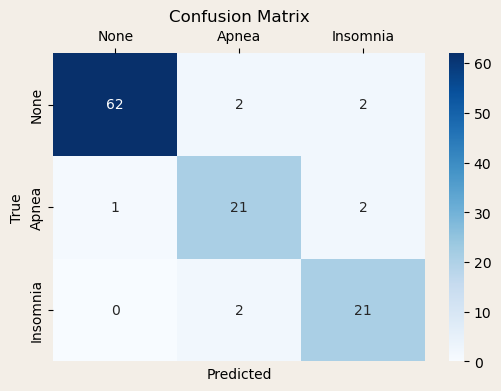

In [155]:
# Print test accuracy
pipeline_nb.fit(X_train, y_train)
print("Test Accuracy:", settings.score_formatter(pipeline_nb.score(X_test, y_test), 4))

# Generate prediction and show classification report
y_pred = pipeline_nb.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Generate confusion matrix
class_labels = ["None","Apnea","Insomnia"]
conf_matrix = confusion_matrix(y_test, y_pred)

settings.plot_conf_matrix(class_labels, conf_matrix)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>Model best at predicting None, with a very high precision and slightly lower, yet still high, recall</li>
    <li>Apnea has the lowest recall at 88% (3 incorrect out of test 23 instances)</li>
    <li>Insomnia has higher recall at 91% (2 incorrect out of 24 instances)</li>
    <li>Both have precision at 84%</li>
</ul>
</div>


*Addressing Class Imbalance: Exploring SMOTE-NC*

In [156]:
# instantiate SMOTENC object with categorical indicies of transformed X_train dataset
smote_n = SMOTEN(random_state=42)

# Proving smote object works using the X array transformed by column_trans
from collections import Counter
smote_x, smote_y = smote_n.fit_resample(transformed_X_train_df, y_train)
print(f"Original class counts: {Counter(y_train)}")
print(f"New class counts: {Counter(smote_y)}")


Original class counts: Counter({0: 153, 2: 54, 1: 54})
New class counts: Counter({2: 153, 1: 153, 0: 153})


In [157]:
# SET UP AND VERIFICATION OF TRANSFORMERS STEPS BEFORE PIPELINE

# Create a custom binner for df transform
binner = settings.CustomBinnerNB()

# Transform step 1
binned_X_train_array = binner.fit_transform(X_train)
binned_X_test_array = binner.transform(X_test)

# Retrieve new column names for OneHotEncoder
ALL_FEATURES_BINS = binned_X_train_array.columns 

# Create a column transformer for encoding
column_trans = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse = False, handle_unknown='ignore'), ALL_FEATURES_BINS)
    ],
    remainder='passthrough')

# Transform step 2
transformed_X_train_array = column_trans.fit_transform(binned_X_train_array)
transformed_X_test_array = column_trans.transform(binned_X_test_array)

# # Convert to df as a sense check. Use only for interpretibility before using for pipeline. 
transformed_X_train_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_train_array)
transformed_X_test_df = settings.convert_transformed_features_to_df(column_trans, transformed_X_test_array)

In [158]:
# Set up pipeline using imblearn's Pipeline class (SMOTE not compatible with sklearn's Pipeline)
# Reuse model with tuned hyperparameters
steps = [('binner', binner), ('column_trans', column_trans), ('smote', smote_n), ("bernoulli_naive_bayes", model_nb)]
pipeline_nb = Pipeline_imb(steps)

# Fit pipeline and produce training accuracy
pipeline_nb.fit(X_train, y_train)
train_acc = pipeline_nb.score(X_train, y_train)
print('Train Accuracy:', settings.score_formatter(train_acc, 3))

# run training cross validation on pipeline 
cv_scores = cross_val_score(pipeline_nb, X_train, y_train, scoring='accuracy', cv=cv_nb)

# Calculate mean and standard deviation of cross-validation train scores
mean_train_cv = np.mean(cv_scores)
std_train_cv = np.std(cv_scores)
print('Mean CV Train Accuracy:', settings.score_formatter(mean_train_cv, 4),
    "( +-", settings.score_formatter(std_train_cv, 3), ")")

# extract model (remove smote for test) and produce test score 
model_nb = pipeline_nb.named_steps['bernoulli_naive_bayes']
test_accuracy = model_nb.score(transformed_X_test_df.values, y_test)
print('Test Accuracy:', settings.score_formatter(test_accuracy, 3))


Train Accuracy: 89.300 %
Mean CV Train Accuracy: 88.2700 % ( +- 4.200 % )
Test Accuracy: 92.000 %


In [159]:
# # Visualise averages across many seeds
# settings.plot_seed_variability(X=X, y=y, test_size=0.3, current_seed=42, num_seeds=40, pipeline_or_model=pipeline_nb, scoring="accuracy", cv_object=cv_nb, pipeline_type = "imblearn")


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left; max-width: 1050px; margin: 0 auto; color: #444444;">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

<ul>
    <li>SMOTE train cv accuracy improved very slightly to 88.2%</li> 
    <li>However variability has increased very slightly to 4.2%</li>
    <li>Test accuracy has increased from 91.2% to 92.0%. This increase used to justify this model as current best.</li>
</ul>
</div>


In [160]:
# SAVE BASED ON CV SCORE

# collect candidate tuned pipeline and CV score 
best_pipeline = pipeline_nb
best_cv_score = mean_train_cv

# collect current (saved) best pipeline and CV score
current_best_pipeline = settings.get_saved_pipeline("best_naive_bayes_classification_pipeline.pkl")
current_best_pipeline_mean_cv = np.mean(cross_val_score(current_best_pipeline, X_train, y_train, scoring='accuracy', cv=cv_nb))

# overwrite with candidate if CV score is higher
if best_cv_score > current_best_pipeline_mean_cv:
    settings.save_pipeline("best_naive_bayes_classification_pipeline.pkl", best_pipeline)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        66
           1       0.84      0.88      0.86        24
           2       0.84      0.91      0.87        23

    accuracy                           0.92       113
   macro avg       0.89      0.91      0.90       113
weighted avg       0.92      0.92      0.92       113



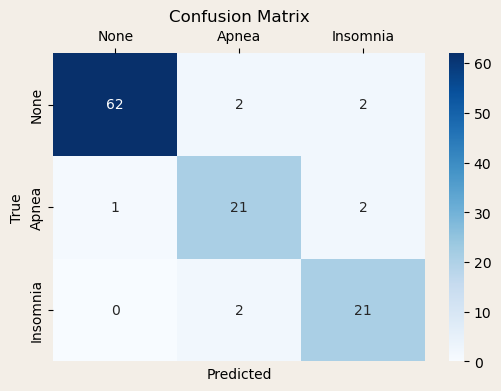

In [120]:
# Generate prediction and show classification report
y_pred = model_nb.predict(transformed_X_test_df.values)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
class_labels = ["None","Apnea","Insomnia"]
conf_matrix = confusion_matrix(y_test, y_pred)

settings.plot_conf_matrix(class_labels, conf_matrix)